In [2]:
import pyart
from wsrlib import *
import matplotlib.pyplot as plt
import numpy as np


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



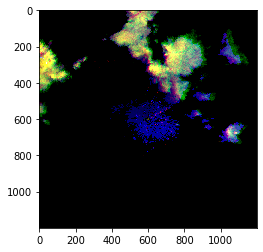

In [84]:
path = 'WSO_201408_volumescan'
key = 'WSO_201408231240_DOPVOL1'
key = 'WSO_201408010010_DOPVOL1'

files = [f'{path}/{key}_{suffix}.iri' for suffix in ['A', 'B', 'C']]
radars = [pyart.io.read(f) for f in files]

data, elev, y, x = radar2mat(radars, coords='cartesian', dim=1200, r_max=80000)

def scale(data, a, b):
    return np.clip((data - a)/(b-a), 0., 1.)

rgb = np.stack((scale(data['reflectivity'][0,:,:], -5, 35),
                scale(data['reflectivity'][1,:,:], -5, 35),
                scale(data['velocity'][0,:,:], -20, 20)),
                axis=2)

plt.imshow(rgb)